In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modelling 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder


### Tabulating the results

from tabulate import tabulate

### Model Validation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
dataset = pd.read_csv('credit_score2.csv')

In [3]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## Exploratory Data Analysis (EDA)

In [4]:
dataset.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

#### features that should be numeric: Month, Age, Num_of_Loan, Outstanding_Debt, Annual_Income, Amount_invested_monthly, Monthly_Balance, Num_of_Delayed_Payment, Changed_Credit_Limit

In [5]:
dataset.Month = pd.to_datetime(dataset.Month,format="%B").dt.month
dataset.Month = dataset.Month.astype('int64')

In [6]:
num_cols=['Age','Num_of_Loan']
for col in num_cols:
    print(col)
    dataset[col] = dataset[col].str.extract('(\d+)').astype('int64')

Age
Num_of_Loan


In [7]:
num_cols=['Outstanding_Debt','Annual_Income','Amount_invested_monthly','Monthly_Balance','Num_of_Delayed_Payment','Changed_Credit_Limit']
for col in num_cols:
    print(col)
    dataset[col] = dataset[col].str.extract('(\d+)').astype('float')

Outstanding_Debt
Annual_Income
Amount_invested_monthly
Monthly_Balance
Num_of_Delayed_Payment
Changed_Credit_Limit


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

#### dropping columns have too much unique values

In [9]:
print('Name:',len(dataset.Name.unique()))
print('SSN:', len(dataset.SSN.unique()))
print('Customer_ID:',len(dataset.Customer_ID.unique()))
print('ID:', len(dataset.ID.unique()))
print('Credit_History_Age:', len(dataset.Credit_History_Age.unique()))


Name: 10140
SSN: 12501
Customer_ID: 12500
ID: 100000
Credit_History_Age: 405


In [10]:
dataset = dataset.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_History_Age' ], axis = 1)
dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,_,809.0,26.822620,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good
1,2,23,Scientist,19114.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,31.944960,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good
2,3,500,Scientist,19114.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,28.609352,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good
3,4,23,Scientist,19114.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,31.377862,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good
4,5,23,Scientist,19114.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,24.797347,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,Mechanic,39628.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.0,34.663572,No,35.104023,60.0,High_spent_Large_value_payments,NaN,Poor
99996,5,25,Mechanic,39628.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.0,40.565631,No,35.104023,54.0,High_spent_Medium_value_payments,NaN,Poor
99997,6,25,Mechanic,39628.0,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,3.0,Good,502.0,41.255522,No,35.104023,24.0,High_spent_Large_value_payments,NaN,Poor
99998,7,25,Mechanic,39628.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,Good,502.0,33.638208,No,35.104023,251.0,Low_spent_Large_value_payments,NaN,Standard


#### Function for replacing empty cells by the median value

In [11]:
def fill_missing_values_by_median(col):
    print(col)
    payment_index = list(~dataset[col].isnull())
    median_payment = np.median(dataset[col].loc[payment_index])
    dataset[col].fillna(median_payment, inplace = True)
    print(median_payment)

#### function for log transforming 

In [12]:
def log_transforming(col):
    print(col)
    modified = [np.log(el) if el > 0 else 0 for el in dataset[col]]
    dataset[col] = modified

## Age

Text(0.5, 1.0, 'Age Distribution')

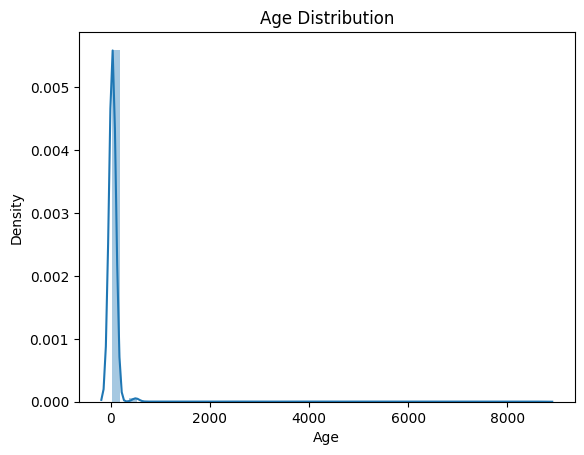

In [13]:
sns.distplot(dataset['Age'])
plt.title('Age Distribution')

#### there are obvious outliers. let us drop values higher then 1000

In [14]:
dataset = dataset[dataset['Age']<=100]
dataset = dataset.reset_index(drop=True)

Text(0.5, 1.0, 'Age Distribution')

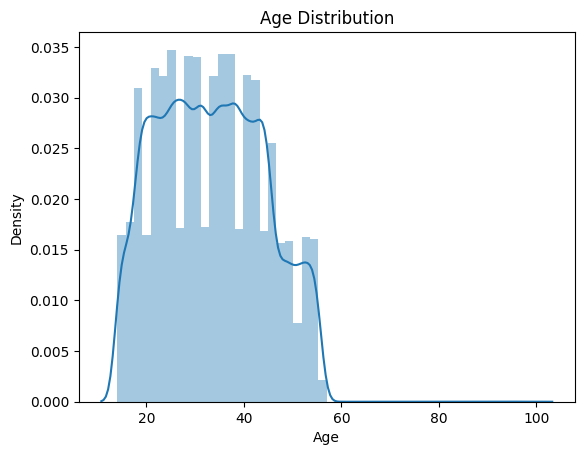

In [15]:
sns.distplot(dataset['Age'])
plt.title('Age Distribution')

## Monthly_Inhand_Salary

#### Monthly Inhand Salary distribution by Credit Score

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

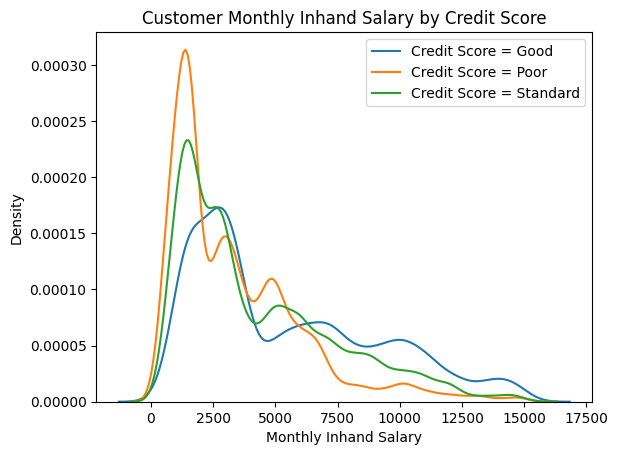

In [16]:
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

#### finding the mean value of the Monthly_Inhand_Salary depending of Credit_Score

In [17]:
salary_good_mean = np.mean(dataset[dataset['Credit_Score'] == 'Good']['Monthly_Inhand_Salary'])
salary_poor_mean = np.mean(dataset[dataset['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary'])
salary_standard_mean = np.mean(dataset[dataset['Credit_Score'] == 'Standard']['Monthly_Inhand_Salary'])
(salary_good_mean, salary_poor_mean, salary_standard_mean)

(5392.787348962568, 3380.2159090779874, 4240.961691458348)

#### replacing the missing values in the Monthly_Inhand_Salary depending of Credit_Score type

In [18]:
index_values = list(dataset['Monthly_Inhand_Salary'].isnull())

for index in range(len(dataset)):
    if index_values[index]:
        if dataset['Credit_Score'][index] == 'Good':
            dataset['Monthly_Inhand_Salary'][index] = salary_good_mean
        elif dataset['Credit_Score'][index] == 'Poor':
            dataset['Monthly_Inhand_Salary'][index] = salary_poor_mean
        else:
            dataset['Monthly_Inhand_Salary'][index] = salary_standard_mean

## Type_of_Loan

In [19]:
dataset['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [20]:
len(dataset['Type_of_Loan'].unique())

6261

#### create a dictionary to store the counts of all the various Type_of_Loan:

In [21]:
index_values = ~dataset['Type_of_Loan'].isnull().values
loan_type_data = list(dataset['Type_of_Loan'][index_values])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specifie

In [22]:
loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 36926,
 'Credit-Builder Loan': 39356,
 'Personal Loan': 37836,
 'Home Equity Loan': 38027,
 'Not Specified': 38472,
 'Mortgage Loan': 37866,
 'Student Loan': 37888,
 'Debt Consolidation Loan': 37717,
 'Payday Loan': 39416}

#### create new 8 columns for every value of Type_of_Loan columns (without Not Specified)

In [23]:
empty_array = [0] * (len(dataset))

In [24]:
auto_loan = empty_array
credit_builder_loan = empty_array
personal_loan = empty_array
home_equity_loan = empty_array
mortgage_loan = empty_array
student_loan = empty_array
debt_consolidation_loan = empty_array
payday_loan = empty_array

In [25]:
for index in range(len(loan_type_data)):
    if 'Auto' in loan_type_data[index]:
        auto_loan[index] = 1
    
    if 'Credit-Builder' in loan_type_data[index]:
        credit_builder_loan[index] = 1
        
    if 'Personal' in loan_type_data[index]:
        personal_loan[index] = 1
    
    if 'Home' in loan_type_data[index]:
        home_equity_loan[index] = 1
    
    if 'Mortgage' in loan_type_data[index]:
        mortgage_loan[index] = 1
    
    if 'Student' in loan_type_data[index]:
        student_loan[index] = 1
        
    if 'Debt' in loan_type_data[index]:
        debt_consolidation_loan[index] = 1
    
    if 'Payday' in loan_type_data[index]:
        payday_loan[index] = 1

In [26]:
dataset['Auto_Loan'] = auto_loan
dataset['Credit_Builder_Loan'] = credit_builder_loan
dataset['Personal_Loan'] = personal_loan
dataset['Home_Enquity_Loan'] = home_equity_loan
dataset['Mortgage_Loan'] = mortgage_loan
dataset['Student_Loan'] = student_loan
dataset['Debt_Consolidation_Loan'] = debt_consolidation_loan
dataset['Payday_Loan'] = payday_loan
dataset['Payday_Loan'] = payday_loan
dataset.drop(['Type_of_Loan'], axis = 1, inplace = True)

## Num_of_Delayed_Payment

#### fill missing values

In [27]:
fill_missing_values_by_median('Num_of_Delayed_Payment')

Num_of_Delayed_Payment
14.0


## Num_Credit_Inquiries

In [28]:
dataset.Num_Credit_Inquiries.value_counts()

Num_Credit_Inquiries
4.0       10939
3.0        8637
6.0        7896
7.0        7857
2.0        7811
          ...  
1753.0        1
782.0         1
1294.0        1
2597.0        1
74.0          1
Name: count, Length: 1207, dtype: int64

#### delete strings where Num_Credit_Inquiries>100

In [29]:
dataset = dataset[dataset.Num_Credit_Inquiries<100]

#### fill missing values

In [30]:
fill_missing_values_by_median('Num_Credit_Inquiries')

Num_Credit_Inquiries
5.0


## Amount_invested_monthly

#### fill missing values

In [31]:
fill_missing_values_by_median('Amount_invested_monthly')

Amount_invested_monthly
135.0


## Monthly_Balance

#### fill missing values

In [32]:
fill_missing_values_by_median('Monthly_Balance')

Monthly_Balance
336.0


## Num_Bank_Accounts

Text(0.5, 1.0, 'Num_Bank_Accounts Distribution')

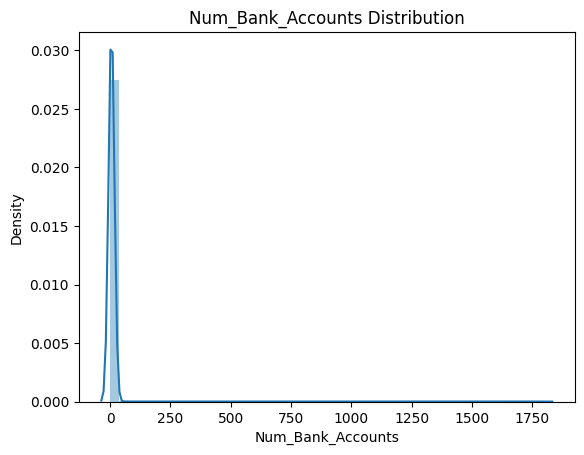

In [33]:
sns.distplot(dataset['Num_Bank_Accounts'])
plt.title('Num_Bank_Accounts Distribution')

In [34]:
dataset.Num_Bank_Accounts.value_counts()

Num_Bank_Accounts
6       12222
7       12024
8       11989
4       11384
5       11372
        ...  
987         1
1626        1
1470        1
211         1
697         1
Name: count, Length: 896, dtype: int64

In [35]:
dataset[dataset.Num_Bank_Accounts>40]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
261,4,44,Writer,58317.0,4240.961691,1414,5,9,6,18,...,407.0,Standard,1,1,1,1,1,1,1,1
301,7,37,Musician,15566.0,1423.168333,67,5,32,4,12,...,308.0,Poor,1,1,1,1,1,1,1,1
329,4,42,_______,20574.0,4240.961691,572,3,14,4,6,...,349.0,Standard,1,1,1,1,1,1,1,1
345,5,19,Musician,85554.0,7185.502500,1488,2,3,100,14,...,887.0,Good,1,1,1,1,1,1,1,1
732,5,33,Musician,14205.0,1086.757500,91,10,21,8,36,...,265.0,Standard,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96828,8,29,Mechanic,17013.0,1326.774167,813,1,10,1,6,...,336.0,Good,0,0,0,0,0,0,0,0
96874,7,25,Developer,125271.0,10374.330000,1481,7,1,4,10,...,336.0,Poor,0,0,0,0,0,0,0,0
96902,3,31,Lawyer,146310.0,12124.556667,474,4,9,1,3,...,336.0,Standard,0,0,0,0,0,0,0,0
96957,3,53,Architect,36817.0,3198.161667,697,4,5,3,7,...,336.0,Standard,0,0,0,0,0,0,0,0


#### delete values where number of bank accounts are higher then 40

In [36]:
dataset = dataset[dataset.Num_Bank_Accounts < 40]

Text(0.5, 1.0, 'Num_Bank_Accounts Distribution')

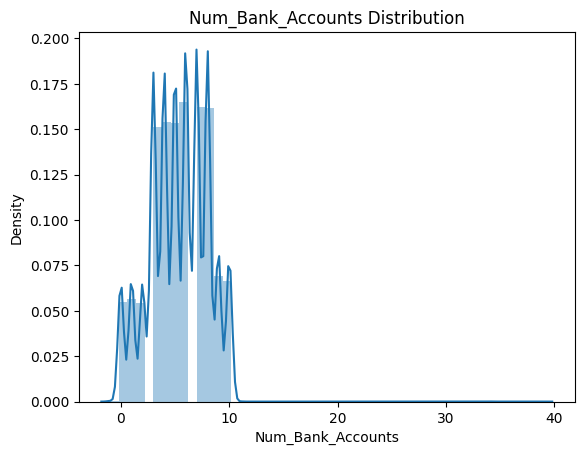

In [37]:
sns.distplot(dataset['Num_Bank_Accounts'])
plt.title('Num_Bank_Accounts Distribution')

## Num_Credit_Card

Text(0.5, 1.0, 'Num_Credit_Card Distribution')

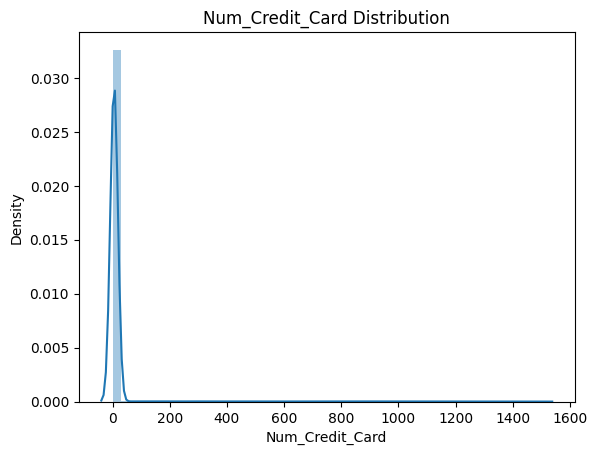

In [38]:
sns.distplot(dataset['Num_Credit_Card'])
plt.title('Num_Credit_Card Distribution')

In [39]:
dataset.Num_Credit_Card.value_counts()

Num_Credit_Card
5       17081
7       15398
6       15340
4       12998
3       12286
        ...  
700         1
204         1
175         1
693         1
1430        1
Name: count, Length: 1147, dtype: int64

#### delete values where number of credit cards are higher then 40

In [40]:
dataset = dataset[dataset.Num_Credit_Card < 40]

In [41]:
dataset = dataset.reset_index(drop=True)

In [42]:
dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,1,23,Scientist,19114.0,1824.843333,3,4,3,4,3,...,312.0,Good,1,1,1,1,1,1,1,1
1,2,23,Scientist,19114.0,5392.787349,3,4,3,4,-1,...,284.0,Good,1,1,1,1,1,1,1,1
2,4,23,Scientist,19114.0,5392.787349,3,4,3,4,5,...,223.0,Good,1,1,1,1,1,1,1,1
3,5,23,Scientist,19114.0,1824.843333,3,4,3,4,6,...,341.0,Good,1,1,1,1,1,1,1,1
4,6,23,Scientist,19114.0,5392.787349,3,4,3,4,8,...,340.0,Good,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90475,4,25,Mechanic,39628.0,3359.415833,4,6,7,2,23,...,336.0,Poor,0,0,0,0,0,0,0,0
90476,5,25,Mechanic,39628.0,3359.415833,4,6,7,2,18,...,336.0,Poor,0,0,0,0,0,0,0,0
90477,6,25,Mechanic,39628.0,3359.415833,4,6,5729,2,27,...,336.0,Poor,0,0,0,0,0,0,0,0
90478,7,25,Mechanic,39628.0,3359.415833,4,6,7,2,20,...,336.0,Standard,0,0,0,0,0,0,0,0


## Changed_Credit_Limit

#### fill missing values

In [43]:
fill_missing_values_by_median('Changed_Credit_Limit')

Changed_Credit_Limit
9.0


In [44]:
dataset.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Auto_Loan                   0
Credit_Builder_Loan         0
Personal_Loan               0
Home_Enquity_Loan           0
Mortgage_Loan               0
Student_Loan                0
Debt_Consolidation_Loan     0
Payday_Loan                 0
dtype: int64

In [45]:
num_cols = dataset.select_dtypes(include=['int64','float64']).columns

Amount_invested_monthly


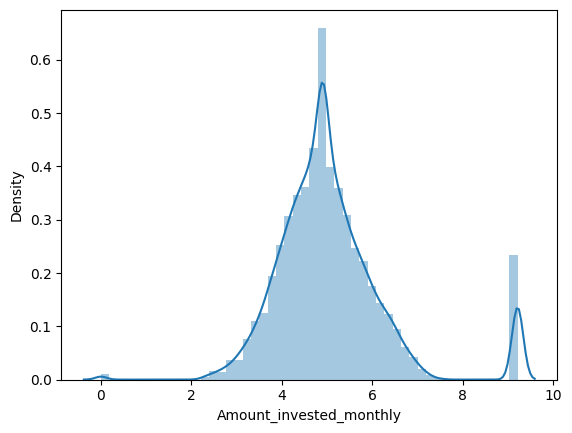

Total_EMI_per_month


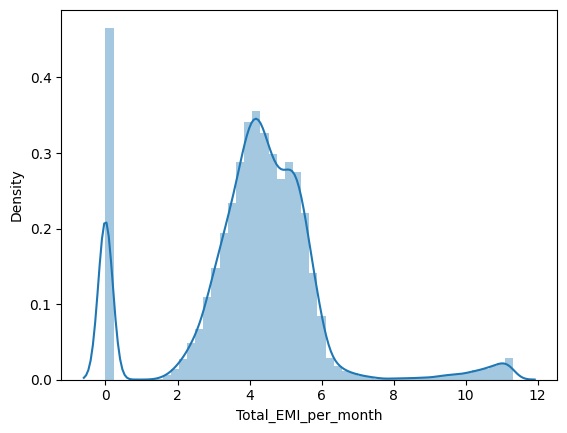

Annual_Income


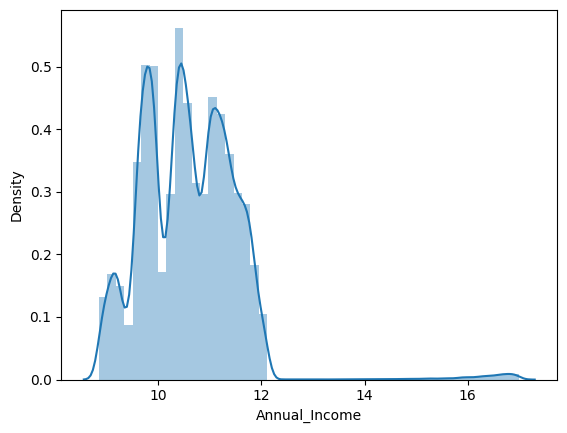

Num_of_Delayed_Payment


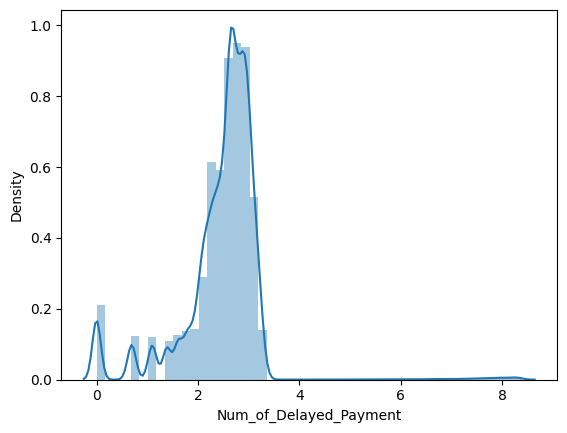

Monthly_Balance


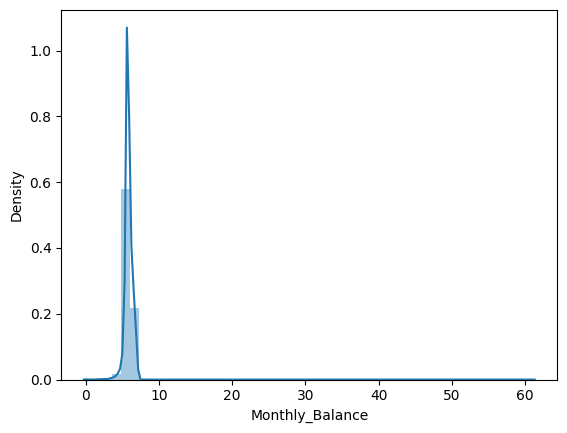

Interest_Rate


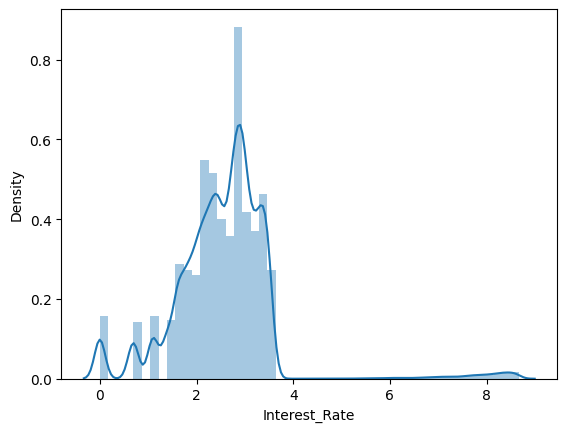

Num_of_Loan


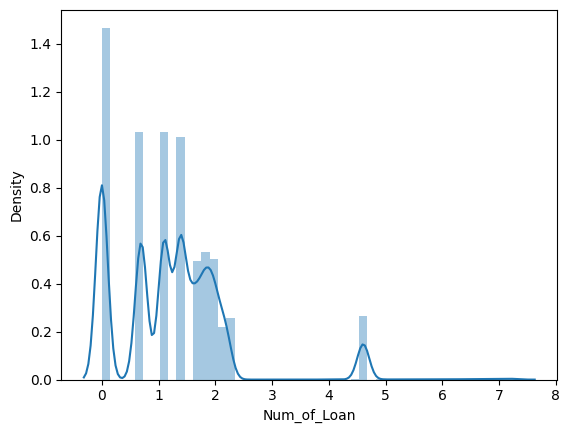

In [46]:
log_transform_list = ['Amount_invested_monthly', 'Total_EMI_per_month', 'Annual_Income', 'Num_of_Delayed_Payment', 
                      'Monthly_Balance', 'Interest_Rate','Num_of_Loan']
for col in log_transform_list:
    log_transforming(col)
    sns.distplot(dataset[col])
    plt.show()

Month


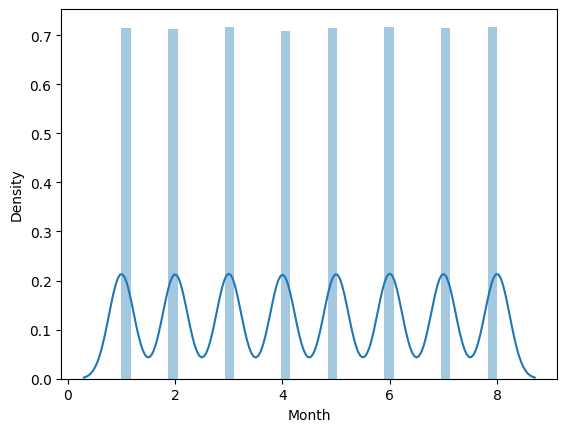

Age


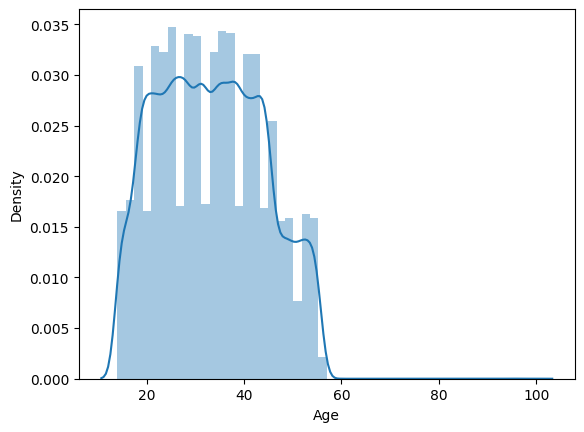

Annual_Income


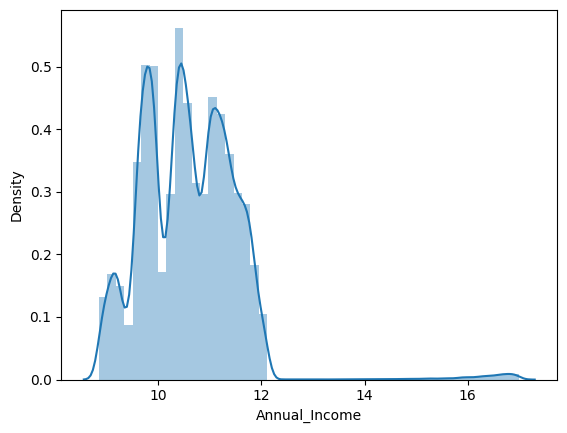

Monthly_Inhand_Salary


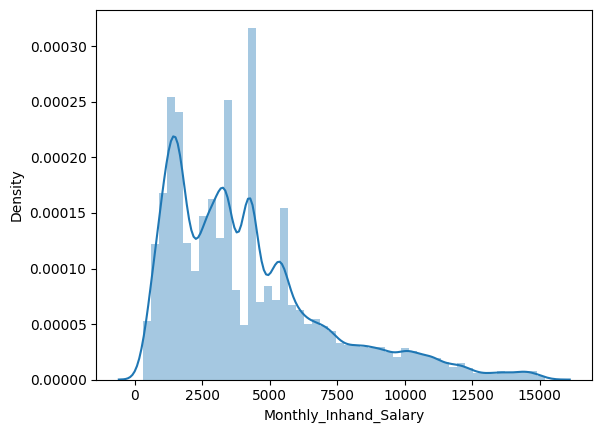

Num_Bank_Accounts


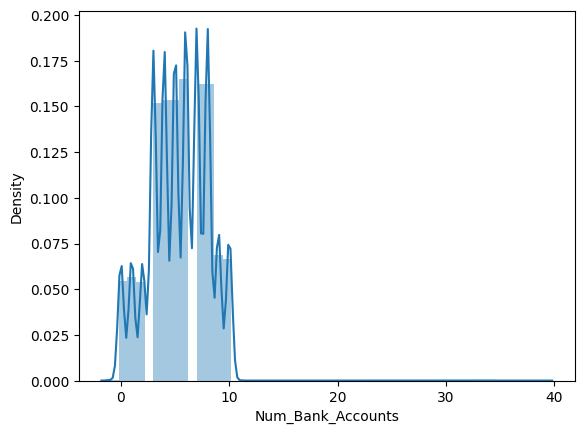

Num_Credit_Card


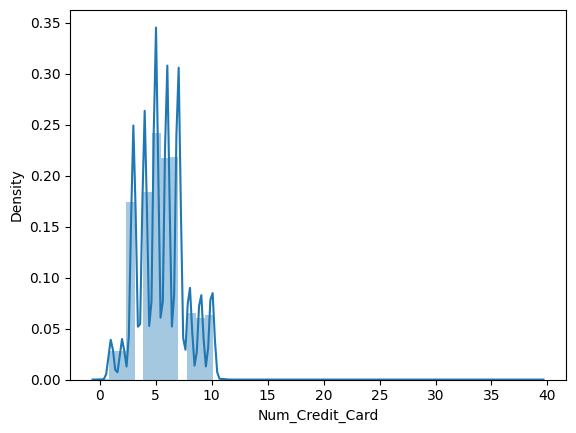

Interest_Rate


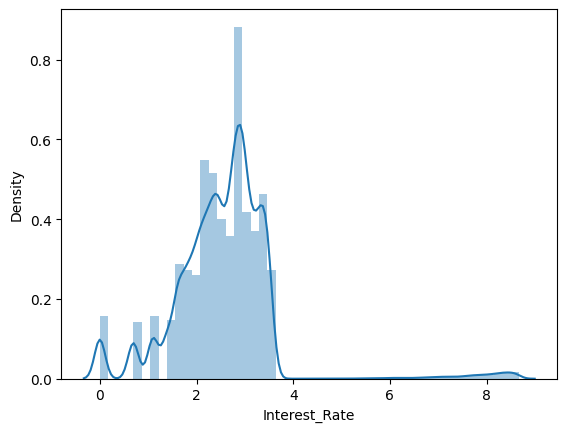

Num_of_Loan


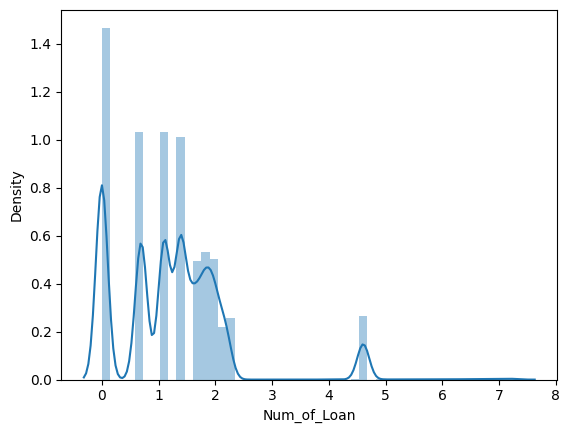

Delay_from_due_date


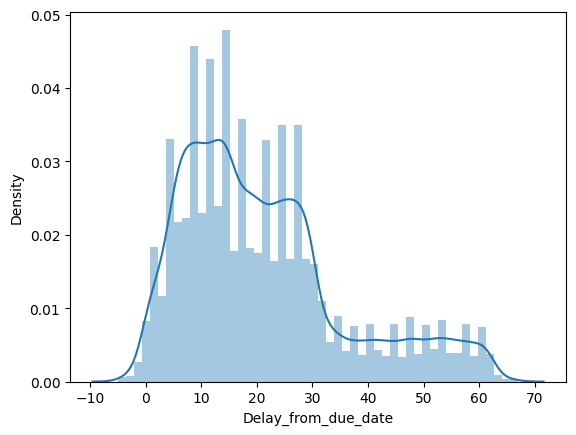

Num_of_Delayed_Payment


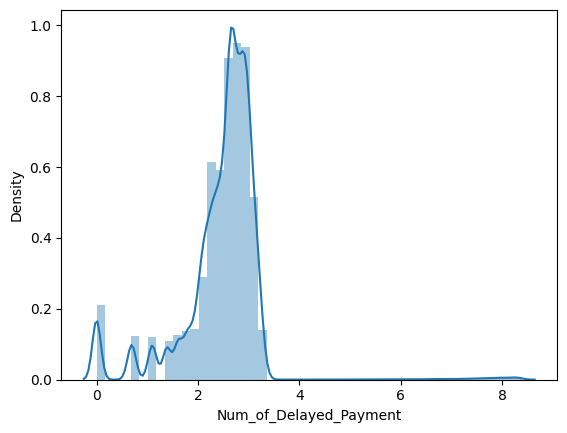

Changed_Credit_Limit


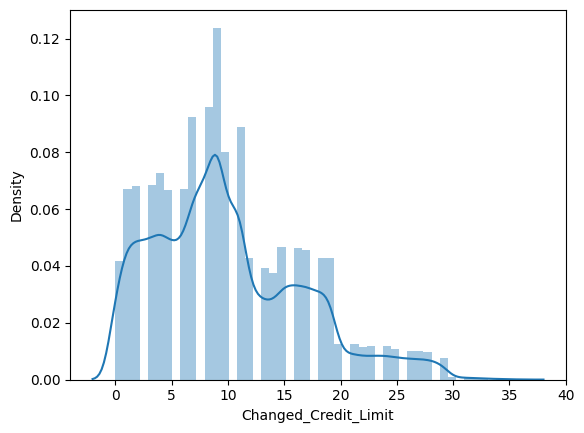

Num_Credit_Inquiries


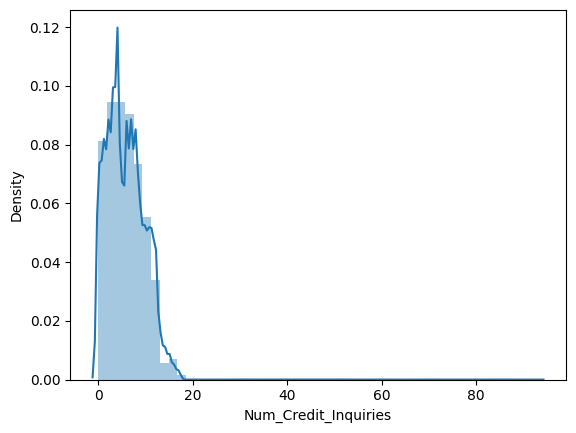

Outstanding_Debt


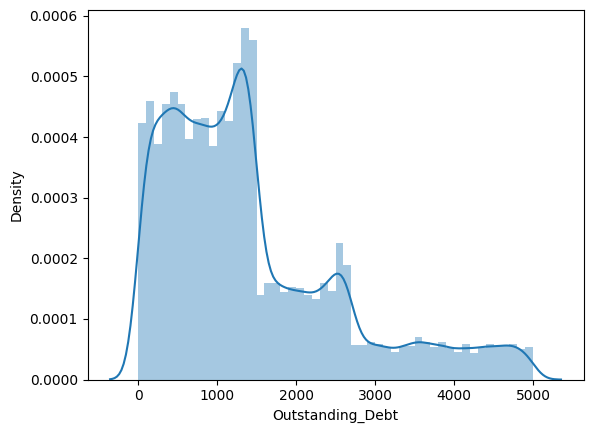

Credit_Utilization_Ratio


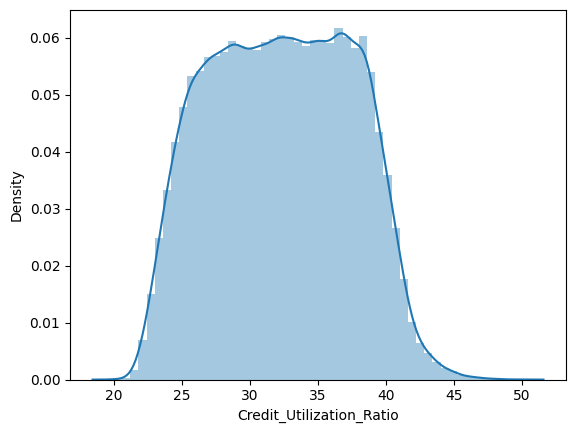

Total_EMI_per_month


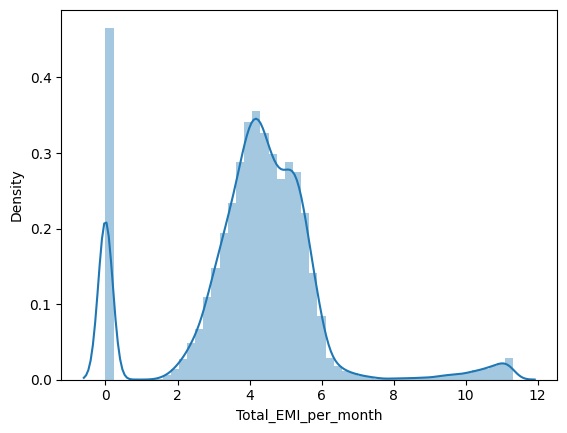

Amount_invested_monthly


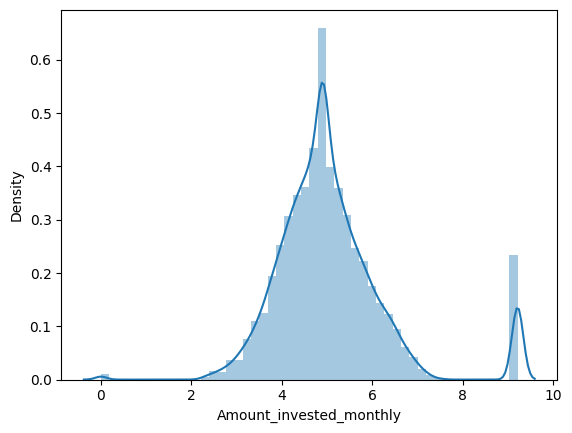

Monthly_Balance


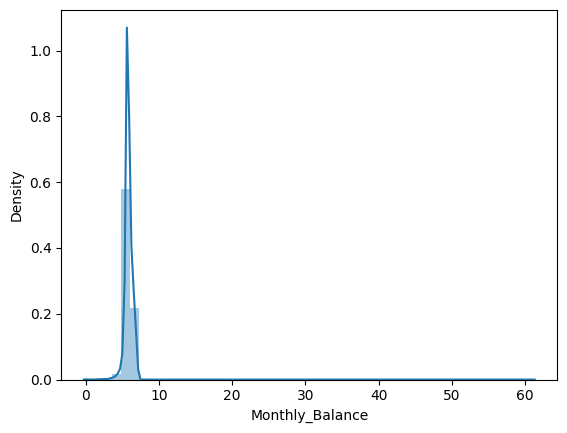

Auto_Loan


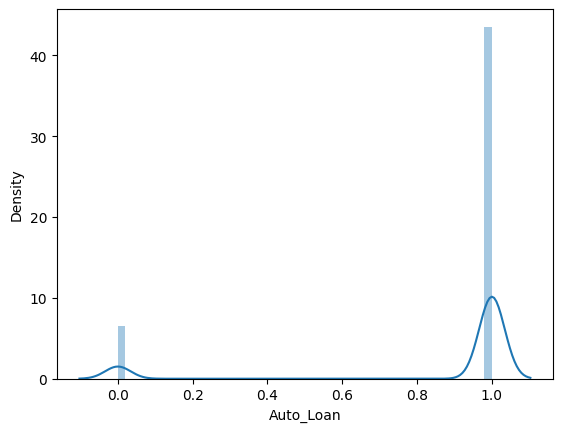

Credit_Builder_Loan


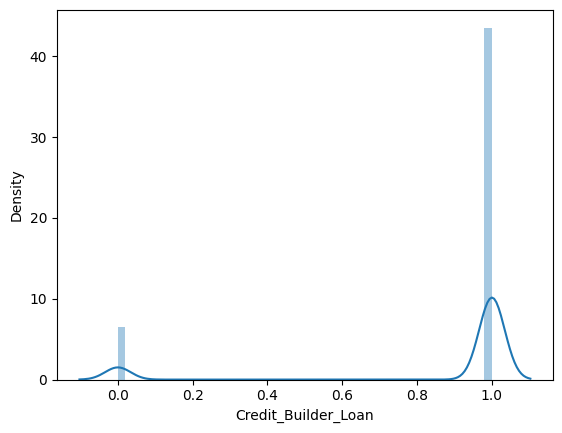

Personal_Loan


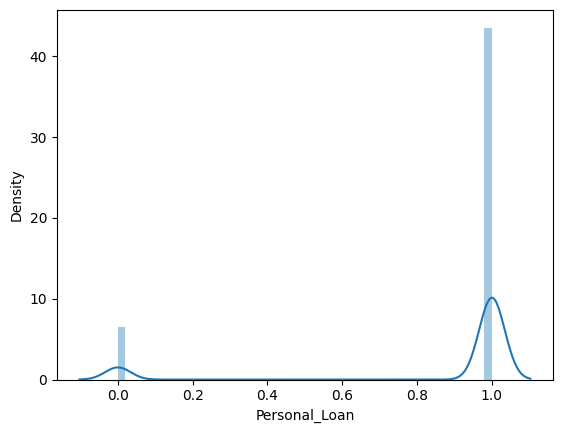

Home_Enquity_Loan


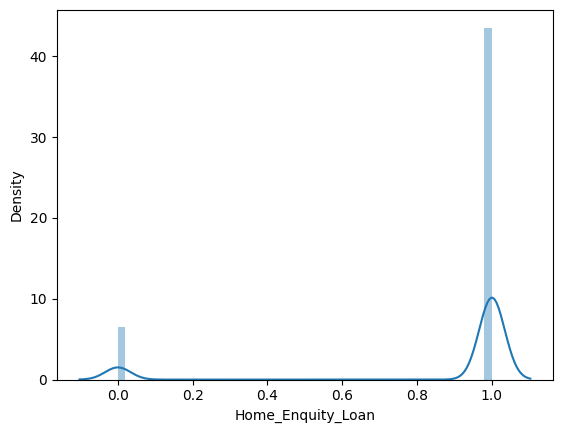

Mortgage_Loan


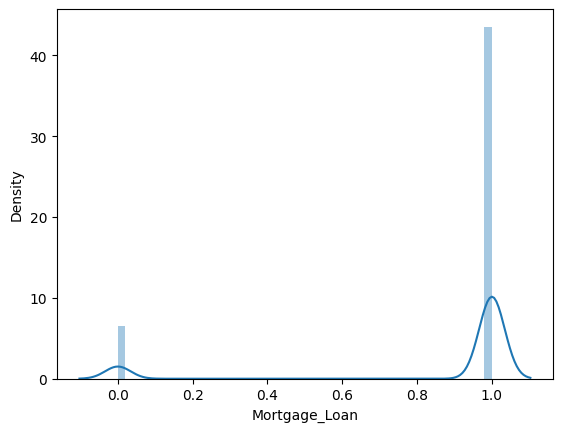

Student_Loan


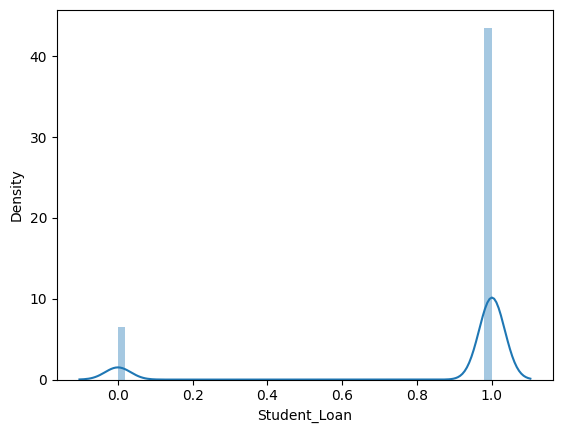

Debt_Consolidation_Loan


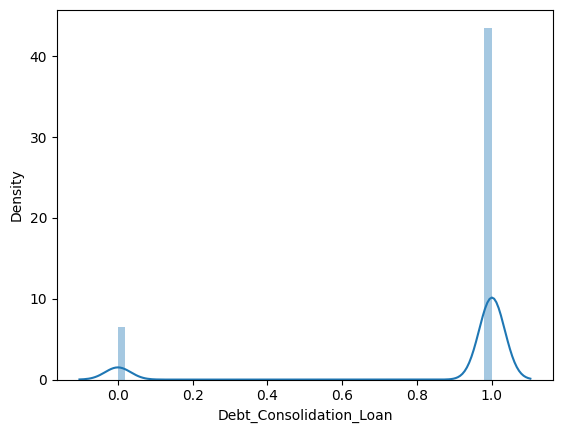

Payday_Loan


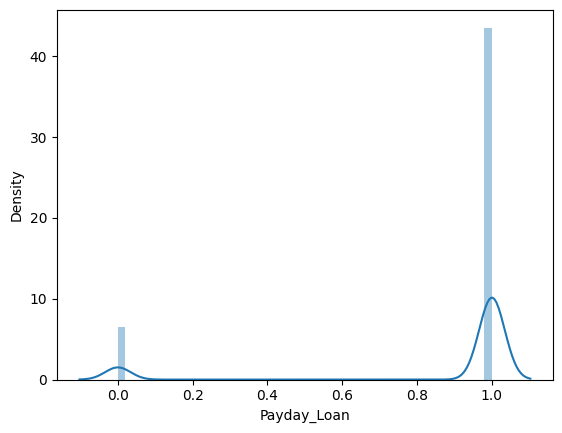

In [47]:
for col in num_cols: 
    print(col)
    sns.distplot(dataset[col])
    plt.show()

## Detect the rest of outliers

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [48]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        print(feature)
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        print(len(outlier_list_col))
        outlier_indices.extend(outlier_list_col) 
        print('-----')
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

cols = [ 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
outliers_to_drop = detect_outliers(dataset, 2, cols)
#print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Annual_Income
889
-----
Monthly_Inhand_Salary
3908
-----
Interest_Rate
6541
-----
Num_of_Loan
3938
-----
Delay_from_due_date
3646
-----
Num_of_Delayed_Payment
7546
-----
Num_Credit_Inquiries
738
-----
Outstanding_Debt
4754
-----
Credit_Utilization_Ratio
3
-----
Total_EMI_per_month
12368
-----
Amount_invested_monthly
4346
-----
Monthly_Balance
3807
-----


In [49]:
len(outliers_to_drop)

2087

In [50]:
print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 90480 rows
After: 88393 rows


## String features encoding

In [51]:
obj_cols = dataset.select_dtypes(include=['object']).columns

In [52]:
dataset[obj_cols]

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,_,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,No,Low_spent_Small_value_payments,Good
3,Scientist,Good,No,High_spent_Medium_value_payments,Good
4,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...
88388,Mechanic,_,No,High_spent_Large_value_payments,Poor
88389,Mechanic,_,No,High_spent_Medium_value_payments,Poor
88390,Mechanic,Good,No,High_spent_Large_value_payments,Poor
88391,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


In [53]:
for col in obj_cols:
    print(dataset[col].value_counts())
    print('---------')

Occupation
_______          6233
Lawyer           5852
Architect        5600
Engineer         5594
Scientist        5568
Mechanic         5568
Accountant       5561
Teacher          5499
Entrepreneur     5490
Media_Manager    5484
Developer        5455
Doctor           5393
Journalist       5366
Manager          5278
Musician         5239
Writer           5213
Name: count, dtype: int64
---------
Credit_Mix
Standard    32898
Good        20679
_           17841
Bad         16975
Name: count, dtype: int64
---------
Payment_of_Min_Amount
Yes    47051
No     30726
NM     10616
Name: count, dtype: int64
---------
Payment_Behaviour
Low_spent_Small_value_payments      22697
High_spent_Medium_value_payments    15539
Low_spent_Medium_value_payments     12257
High_spent_Large_value_payments     11826
High_spent_Small_value_payments     10113
Low_spent_Large_value_payments       9274
!@9#%8                               6687
Name: count, dtype: int64
---------
Credit_Score
Standard    47220
Poor  

In [54]:
label_encoder = LabelEncoder()
for col in obj_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88393 entries, 0 to 88392
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     88393 non-null  int64  
 1   Age                       88393 non-null  int64  
 2   Occupation                88393 non-null  int32  
 3   Annual_Income             88393 non-null  float64
 4   Monthly_Inhand_Salary     88393 non-null  float64
 5   Num_Bank_Accounts         88393 non-null  int64  
 6   Num_Credit_Card           88393 non-null  int64  
 7   Interest_Rate             88393 non-null  float64
 8   Num_of_Loan               88393 non-null  float64
 9   Delay_from_due_date       88393 non-null  int64  
 10  Num_of_Delayed_Payment    88393 non-null  float64
 11  Changed_Credit_Limit      88393 non-null  float64
 12  Num_Credit_Inquiries      88393 non-null  float64
 13  Credit_Mix                88393 non-null  int32  
 14  Outsta

## Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
features = dataset.columns.drop('Credit_Score')
features

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan'],
      dtype='object')

In [58]:
dataset[features] = pd.DataFrame(MinMaxScaler().fit_transform(dataset[features]),columns=features)

In [59]:
dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,0.000000,0.104651,0.8,0.123205,0.102087,0.100,0.102564,0.126806,0.189647,0.111111,...,0.094038,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.142857,0.104651,0.8,0.123205,0.341531,0.100,0.102564,0.126806,0.189647,0.055556,...,0.092498,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.428571,0.104651,0.8,0.123205,0.341531,0.100,0.102564,0.126806,0.189647,0.138889,...,0.088539,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.571429,0.104651,0.8,0.123205,0.102087,0.100,0.102564,0.126806,0.189647,0.152778,...,0.095493,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.714286,0.104651,0.8,0.123205,0.341531,0.100,0.102564,0.126806,0.189647,0.180556,...,0.095445,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88388,0.428571,0.127907,0.6,0.212695,0.205072,0.125,0.153846,0.224605,0.094823,0.388889,...,0.095251,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88389,0.571429,0.127907,0.6,0.212695,0.205072,0.125,0.153846,0.224605,0.094823,0.319444,...,0.095251,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88390,0.714286,0.127907,0.6,0.212695,0.205072,0.125,0.153846,0.998797,0.094823,0.444444,...,0.095251,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88391,0.857143,0.127907,0.6,0.212695,0.205072,0.125,0.153846,0.224605,0.094823,0.347222,...,0.095251,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split into train and test

In [60]:
X = dataset[features]
y = dataset['Credit_Score']

In [61]:
X.shape

(88393, 29)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [63]:
X_train.shape, X_test.shape

((70714, 29), (17679, 29))

### 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Credit Score detection is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

1. Logistic regression
2. Support vector classification
3. K-nearest neighbours
4. Naive Bayes
5. Decision tree
6. Random forest

Here, we will only be focusing on the data belonging to Good and Poor credit scores.

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

#### 5.2 Fit Model

In [64]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

In [65]:
### Dictionary to store model and its precision

model_precision = OrderedDict()

In [66]:
### Dictionary to store model and its recall

model_recall = OrderedDict()

In [67]:
for col in X_train.columns:
    if X_train[col].isnull().values.any():
        print(col)

In [68]:
np.where(X_train['Changed_Credit_Limit'].isnull().values)

(array([], dtype=int64),)

##### 5.2.1 Applying Logistic Regression

In [69]:
### Training the Logistic Regression model on the dataset

logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=27)

In [70]:
### Predicting the Test set results

Y_pred = logistic_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [71]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

logistic_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Logistic Regression'] = logistic_precision

logistic_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Logistic Regression'] = logistic_recall

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The precision of this model is {} %.'.format(logistic_precision))
print('The recall of this model is {} %.'.format(logistic_recall))

[[1256   44 1759]
 [ 216 2624 2265]
 [ 771 1338 7406]]
The accuracy of this model is 63.84 %.
The precision of this model is 63.48 %.
The recall of this model is 63.84 %.


##### 5.2.2 Applying K-Nearest Neighbors (k = 1)

In [72]:
### Applying 1NN model

classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
### Predicting the Test set results

Y_pred = classifier_1nn.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

AttributeError: 'Series' object has no attribute 'reshape'

In [74]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn1_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['1 - Nearest Neighbors'] = nn1_accuracy

nn1_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['1 - Nearest Neighbors'] = nn1_precision

nn1_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['1 - Nearest Neighbors'] = nn1_recall

print('The accuracy of this model is {} %.'.format(nn1_accuracy))
print('The precision of this model is {} %.'.format(nn1_precision))
print('The recall of this model is {} %.'.format(nn1_recall))

[[1417  387 1255]
 [ 350 2840 1915]
 [1188 1952 6375]]
The accuracy of this model is 60.14 %.
The precision of this model is 60.08 %.
The recall of this model is 60.14 %.


##### 5.2.3 Applying K - Nearest Neighbors (k = 3)

In [75]:
### Applying 3NN model

classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
### Predicting the Test set results

Y_pred = classifier_3nn.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [84]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn3_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['3 - Nearest Neighbors'] = nn3_accuracy

nn3_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['3 - Nearest Neighbors'] = nn3_precision

nn3_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['3 - Nearest Neighbors'] = nn3_recall

print('The accuracy of this model is {} %.'.format(nn3_accuracy))
print('The precision of this model is {} %.'.format(nn3_precision))
print('The recall of this model is {} %.'.format(nn3_recall))

[[1710  185 1164]
 [ 530 2839 1736]
 [1419 1506 6590]]
The accuracy of this model is 63.01 %.
The precision of this model is 63.56 %.
The recall of this model is 63.01 %.


##### 5.2.4 Applying K - Nearest Neighbors (k = 5)

In [85]:
### Applying 5NN model

classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, Y_train)

KNeighborsClassifier()

In [87]:
### Predicting the Test set results

Y_pred = classifier_5nn.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [88]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn5_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['5 - Nearest Neighbors'] = nn5_accuracy

nn5_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['5 - Nearest Neighbors'] = nn5_precision

nn5_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['5 - Nearest Neighbors'] = nn5_recall

print('The accuracy of this model is {} %.'.format(nn5_accuracy))
print('The precision of this model is {} %.'.format(nn5_precision))
print('The recall of this model is {} %.'.format(nn5_recall))

[[1730  211 1118]
 [ 506 2948 1651]
 [1281 1595 6639]]
The accuracy of this model is 64.01 %.
The precision of this model is 64.4 %.
The recall of this model is 64.01 %.


##### 5.2.5 Applying K - Nearest Neighbors (k = 7)

In [89]:
### Applying 7NN model

classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
### Predicting the Test set results

Y_pred = classifier_7nn.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [91]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn7_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['7 - Nearest Neighbors'] = nn7_accuracy

nn7_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['7 - Nearest Neighbors'] = nn7_precision

nn7_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['7 - Nearest Neighbors'] = nn7_recall

print('The accuracy of this model is {} %.'.format(nn7_accuracy))
print('The precision of this model is {} %.'.format(nn7_precision))
print('The recall of this model is {} %.'.format(nn7_recall))

[[1727  127 1205]
 [ 455 2969 1681]
 [1204 1501 6810]]
The accuracy of this model is 65.08 %.
The precision of this model is 65.28 %.
The recall of this model is 65.08 %.


Now let's plot the accuracies of all the nearest neighbor models. We can see that the accuracy first increases, reaches a peak and then decreases.

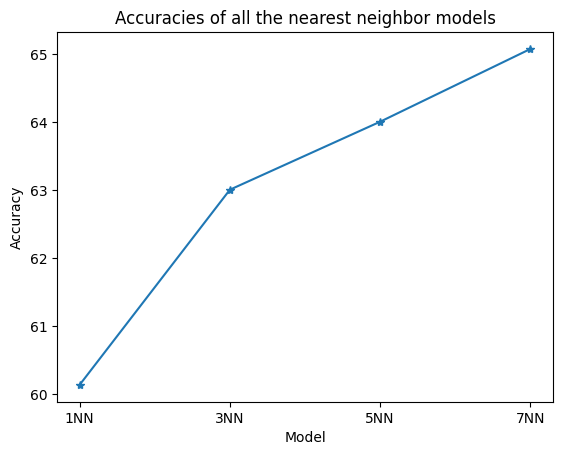

In [92]:
### Looking at the accuracy graph of all the nearest neighbors

labels = ['1NN', '3NN', '5NN', '7NN']
values = [nn1_accuracy, nn3_accuracy, nn5_accuracy, nn7_accuracy]

plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, '*-')
plt.show()

##### 5.2.6 Applying Gaussian Naive Bayes 

In [93]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

GaussianNB()

In [95]:
### Predicting the Test set results

Y_pred = naive_bayes_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [96]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

naive_bayes_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Gaussian Naive Bayes'] = naive_bayes_precision

naive_bayes_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The precision of this model is {} %.'.format(naive_bayes_precision))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

[[2416   89  554]
 [ 777 3538  790]
 [2532 2151 4832]]
The accuracy of this model is 61.01 %.
The precision of this model is 67.09 %.
The recall of this model is 61.01 %.


##### 5.2.7 Applying Decision Tree Classification

In [97]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [99]:
### Predicting the Test set results

Y_pred = decision_tree_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [100]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

decision_tree_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Decision Tree'] = decision_tree_accuracy

decision_tree_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Decision Tree'] = decision_tree_precision

decision_tree_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Decision Tree'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The precision of this model is {} %.'.format(decision_tree_precision))
print('The recall of this model is {} %.'.format(decision_tree_recall))

[[2012  132  915]
 [ 146 3651 1308]
 [ 870 1347 7298]]
The accuracy of this model is 73.31 %.
The precision of this model is 73.3 %.
The recall of this model is 73.31 %.


##### 5.2.8 Applying Random Forest Classification (10 trees)

In [101]:
### Applying Random Forest Classification model (10 trees)

random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=27)

In [103]:
### Predicting the Test set results

Y_pred = random_forest_10_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [104]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_10_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (10 trees)'] = random_forest_10_accuracy

random_forest_10_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (10 trees)'] = random_forest_10_precision

random_forest_10_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (10 trees)'] = random_forest_10_recall

print('The accuracy of this model is {} %.'.format(random_forest_10_accuracy))
print('The precision of this model is {} %.'.format(random_forest_10_precision))
print('The recall of this model is {} %.'.format(random_forest_10_recall))

[[2211   56  792]
 [ 163 4101  841]
 [ 755 1223 7537]]
The accuracy of this model is 78.34 %.
The precision of this model is 78.47 %.
The recall of this model is 78.34 %.


##### 5.2.9 Applying Random Forest Classification (25 trees)

In [105]:
### Applying Random Forest Classification model (25 trees)

random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [106]:
### Predicting the Test set results

Y_pred = random_forest_25_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [107]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_25_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (25 trees)'] = random_forest_25_accuracy

random_forest_25_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (25 trees)'] = random_forest_25_precision

random_forest_25_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (25 trees)'] = random_forest_25_recall

print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))
print('The precision of this model is {} %.'.format(random_forest_25_precision))
print('The recall of this model is {} %.'.format(random_forest_25_recall))

[[2243   34  782]
 [ 123 4142  840]
 [ 638 1030 7847]]
The accuracy of this model is 80.5 %.
The precision of this model is 80.5 %.
The recall of this model is 80.5 %.


##### 5.2.10 Applying Random Forest Classification (50 trees)

In [108]:
### Applying Random Forest Classification model (50 trees)

random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [109]:
### Predicting the Test set results

Y_pred = random_forest_50_classifier.predict(X_test)
#print(np.concatenate([Y_pred, Y_test]))

In [110]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_50_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (50 trees)'] = random_forest_50_accuracy

random_forest_50_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (50 trees)'] = random_forest_50_precision

random_forest_50_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (50 trees)'] = random_forest_50_recall

print('The accuracy of this model is {} %.'.format(random_forest_50_accuracy))
print('The precision of this model is {} %.'.format(random_forest_50_precision))
print('The recall of this model is {} %.'.format(random_forest_50_recall))

[[2251   22  786]
 [ 103 4208  794]
 [ 592  978 7945]]
The accuracy of this model is 81.48 %.
The precision of this model is 81.45 %.
The recall of this model is 81.48 %.


##### 5.2.11 Applying Random Forest Classification (100 trees)

In [111]:
### Applying Random Forest Classification model (100 trees)

random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=27)

In [112]:
### Predicting the Test set results

Y_pred = random_forest_100_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [113]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

random_forest_100_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Random Forest (100 trees)'] = random_forest_100_accuracy

random_forest_100_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Random Forest (100 trees)'] = random_forest_100_precision

random_forest_100_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Random Forest (100 trees)'] = random_forest_100_recall

print('The accuracy of this model is {} %.'.format(random_forest_100_accuracy))
print('The precision of this model is {} %.'.format(random_forest_100_precision))
print('The recall of this model is {} %.'.format(random_forest_100_recall))

[[2261   21  777]
 [ 102 4208  795]
 [ 574  963 7978]]
The accuracy of this model is 81.72 %.
The precision of this model is 81.69 %.
The recall of this model is 81.72 %.


##### 5.2.12 Applying Stacking Classifier

In [114]:
### Preparing the Stacking Classifier

### Define the base models

base_models = list()

base_models.append(('3nn', classifier_3nn))
base_models.append(('decision_tree', decision_tree_classifier))
base_models.append(('random_forest_100', random_forest_100_classifier))

### Define the meta models

meta_model = logistic_classifier

In [115]:
### Applying Stacking Classification

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('3nn', KNeighborsClassifier(n_neighbors=3)),
                               ('decision_tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=27)),
                               ('random_forest_100',
                                RandomForestClassifier(criterion='entropy',
                                                       random_state=27))],
                   final_estimator=LogisticRegression(random_state=27))

In [117]:
### Predicting the Test set results

Y_pred = stacking_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [118]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

stacking_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Stacking Classification'] = stacking_accuracy

stacking_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Stacking Classification'] = stacking_precision

stacking_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Stacking Classification'] = stacking_recall

print('The accuracy of this model is {} %.'.format(stacking_accuracy))
print('The precision of this model is {} %.'.format(stacking_precision))
print('The recall of this model is {} %.'.format(stacking_recall))

[[2280   19  760]
 [  42 4170  893]
 [ 570  941 8004]]
The accuracy of this model is 81.76 %.
The precision of this model is 81.72 %.
The recall of this model is 81.76 %.


##### 5.2.13 Applying Soft Voting Classifier

In [119]:
### Preparing the Soft Voting Classifier

### Creating the list of estimators

estimators = list()

estimators.append(('3nn', classifier_3nn))
estimators.append(('decision_tree', decision_tree_classifier))
estimators.append(('random_forest_100', random_forest_100_classifier))

In [120]:
### Applying Soft Voting Classification

soft_voting_classifier = VotingClassifier(estimators = estimators, voting = 'soft')
soft_voting_classifier.fit(X_train, Y_train)

VotingClassifier(estimators=[('3nn', KNeighborsClassifier(n_neighbors=3)),
                             ('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=27)),
                             ('random_forest_100',
                              RandomForestClassifier(criterion='entropy',
                                                     random_state=27))],
                 voting='soft')

In [122]:
### Predicting the Test set results

Y_pred = soft_voting_classifier.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [123]:
### Making the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

soft_voting_accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
model_accuracy['Soft Voting'] = soft_voting_accuracy

soft_voting_precision = round(100 * precision_score(Y_test, Y_pred, average = 'weighted'), 2)
model_precision['Soft Voting'] = soft_voting_precision

soft_voting_recall = round(100 * recall_score(Y_test, Y_pred, average = 'weighted'), 2)
model_recall['Soft Voting'] = soft_voting_recall

print('The accuracy of this model is {} %.'.format(soft_voting_accuracy))
print('The precision of this model is {} %.'.format(soft_voting_precision))
print('The recall of this model is {} %.'.format(soft_voting_recall))

[[2032   88  939]
 [ 113 3820 1172]
 [ 692 1174 7649]]
The accuracy of this model is 76.37 %.
The precision of this model is 76.28 %.
The recall of this model is 76.37 %.


#### 5.3 Model evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 5.3.1 Training accuracy of the models

Now we will tabulate all the models along with their accuracies. This data is stored in the model_performance dictionary. We will use the tabulate package for tabulating the results.

In [124]:
### Looking at the model accuracy dictionary

model_accuracy

OrderedDict([('Logistic Regression', 63.84),
             ('1 - Nearest Neighbors', 60.14),
             ('7 - Nearest Neighbors', 65.08),
             ('3 - Nearest Neighbors', 63.01),
             ('5 - Nearest Neighbors', 64.01),
             ('Gaussian Naive Bayes', 61.01),
             ('Decision Tree', 73.31),
             ('Random Forest (10 trees)', 78.34),
             ('Random Forest (25 trees)', 80.5),
             ('Random Forest (50 trees)', 81.48),
             ('Random Forest (100 trees)', 81.72),
             ('Stacking Classification', 81.76),
             ('Soft Voting', 76.37)])

In [125]:
### Looking at the model precision dictionary

model_precision

OrderedDict([('Logistic Regression', 63.48),
             ('1 - Nearest Neighbors', 60.08),
             ('7 - Nearest Neighbors', 65.28),
             ('3 - Nearest Neighbors', 63.56),
             ('5 - Nearest Neighbors', 64.4),
             ('Gaussian Naive Bayes', 67.09),
             ('Decision Tree', 73.3),
             ('Random Forest (10 trees)', 78.47),
             ('Random Forest (25 trees)', 80.5),
             ('Random Forest (50 trees)', 81.45),
             ('Random Forest (100 trees)', 81.69),
             ('Stacking Classification', 81.72),
             ('Soft Voting', 76.28)])

In [126]:
### Looking at the model recall dictionary

model_recall

OrderedDict([('Logistic Regression', 63.84),
             ('1 - Nearest Neighbors', 60.14),
             ('7 - Nearest Neighbors', 65.08),
             ('3 - Nearest Neighbors', 63.01),
             ('5 - Nearest Neighbors', 64.01),
             ('Gaussian Naive Bayes', 61.01),
             ('Decision Tree', 73.31),
             ('Random Forest (10 trees)', 78.34),
             ('Random Forest (25 trees)', 80.5),
             ('Random Forest (50 trees)', 81.48),
             ('Random Forest (100 trees)', 81.72),
             ('Stacking Classification', 81.76),
             ('Soft Voting', 76.37)])

In [127]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Model Precision', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_accuracy[model], model_precision[model], model_recall[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│   S.No. │ Classification Model      │   Model Accuracy │   Model Precision │   Model Recall │
╞═════════╪═══════════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│       1 │ Logistic Regression       │            63.84 │             63.48 │          63.84 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       2 │ 1 - Nearest Neighbors     │            60.14 │             60.08 │          60.14 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       3 │ 7 - Nearest Neighbors     │            65.08 │             65.28 │          65.08 │
├─────────┼───────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       4 │ 3 - Nearest Neighbors     │            63.01 │             63.56 │          63.01 │
├─────────┼───────────────────────────┼─

From the above table, we can see that Stacking Classifier has the highest model accuracy of 81.02% among all the other models. It also has the highest precision and recall with 80.98% and 81.02%.

### 6. Conclusion

Hence our recommended model - Stacking Classifier provides a model accuracy of 81.02 percent, a model precision of 80.98 percent, and a model recall of 81.02 percent.